In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fmnist = keras.datasets.fashion_mnist

In [37]:
# 불러오는 형식 주의
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

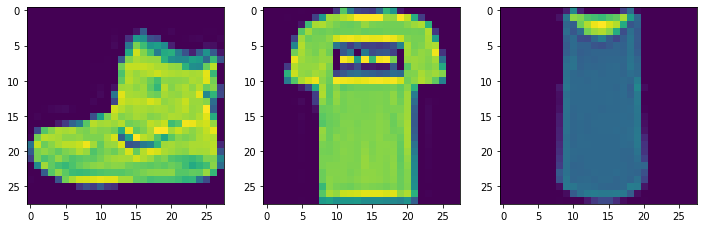

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(X_train[0])
plt.subplot(1,3,2)
plt.imshow(X_train[1])
plt.subplot(1,3,3)
plt.imshow(X_train[2])

In [38]:
# 새로운 하나의 차원을 추가
# 채널정보를 추가함
X_train = X_train[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
# reshape을 수행한거랑 똑같음

In [39]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [44]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size=(3,3), strides=(1,1),
                padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters =32, kernel_size=(3,3), strides=(1,1),
                padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size=(3,3), strides=(1,1),
                padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=130, activation ='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 130)              

In [40]:
# 인코딩 필수!
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [41]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [47]:
hist = model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 127s 67ms/step - loss: 1.2711 - accuracy: 0.7256
Epoch 2/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.3882 - accuracy: 0.8590
Epoch 3/10
1875/1875 [==============================] - 127s 68ms/step - loss: 0.3306 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2929 - accuracy: 0.8934
Epoch 5/10
1875/1875 [==============================] - 132s 70ms/step - loss: 0.2720 - accuracy: 0.9003
Epoch 6/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.2579 - accuracy: 0.9060
Epoch 7/10
1875/1875 [==============================] - 106s 57ms/step - loss: 0.2384 - accuracy: 0.9134
Epoch 8/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2229 - accuracy: 0.9171
Epoch 9/10
1875/1875 [==============================] - 107s 57ms/step - loss: 0.2156 - accuracy: 0.9212
Epoch 10/10
1875/1875 [==============================] 

In [48]:
loss, acc = model.evaluate(X_test, y_test)
print('손실: ', loss)
print('정확도: ', acc)

313/313 [==============================] - 5s 13ms/step - loss: 0.2554 - accuracy: 0.9131
손실:  0.25536882877349854
정확도:  0.913100004196167


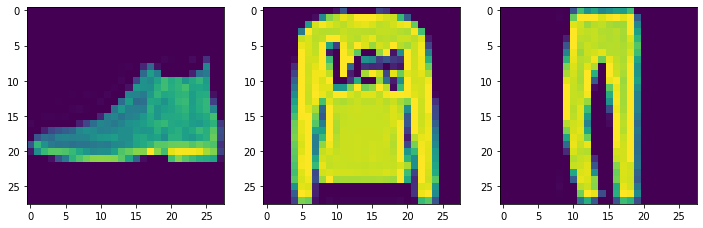

In [52]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(X_test[0])
plt.subplot(1,3,2)
plt.imshow(X_test[1])
plt.subplot(1,3,3)
plt.imshow(X_test[2])